## Pandas module & loading data

In [1]:
import pandas as pd

In [2]:
xls = pd.ExcelFile('yelp.xlsx')
df = xls.parse('yelp_data')

In [3]:
df.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1


## Joining data

In [4]:
df_cities = xls.parse('cities')

In [5]:
df_cities.head()

,id,city
0,1,Bellevue
1,2,Braddock
2,3,Carnegie
3,4,Homestead
4,5,Mc Kees Rocks


In [6]:
df = pd.merge(left=df, right=df_cities, how='inner', left_on='city_id', right_on='id')

In [7]:
df.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,id,city
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,1,Bellevue
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1,1,Bellevue
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,1,Bellevue
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1,1,Bellevue
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1,1,Bellevue


In [8]:
df_states = xls.parse('states')

In [9]:
df_states.head()

,id,state
0,1,PA
1,2,NV


In [10]:
df = pd.merge(left=df, right=df_states, how='inner', left_on='state_id', right_on='id')

In [11]:
df.shape

(600, 12)

In [12]:
df.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,id_x,city,id_y,state
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,1,Bellevue,1,PA
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1,1,Bellevue,1,PA
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,1,Bellevue,1,PA
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1,1,Bellevue,1,PA
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1,1,Bellevue,1,PA


In [13]:
del df['id_x']

In [14]:
del df['id_y']

## Updating & creating data

In [15]:
df["rating"] = df["stars"] * 2

In [16]:
def convert_to_rating(x):
    return (str(x) + " out of 10")

In [17]:
df["rating"] = df["rating"].apply(convert_to_rating)

In [18]:
df.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state,rating
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,Bellevue,PA,5.0 out of 10
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1,Bellevue,PA,9.0 out of 10
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,Bellevue,PA,9.0 out of 10
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1,Bellevue,PA,8.0 out of 10
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1,Bellevue,PA,7.0 out of 10


## Histograms

In [21]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [22]:
import matplotlib.pyplot as plt

In [23]:
df_pitt = df[df["city"] == "Pittsburgh"]

In [24]:
df_pitt.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state,rating
95,Aamco Transmissions,Auto Repair,Automotive,False,21,4.5,8,1,Pittsburgh,PA,9.0 out of 10
96,Animal Rescue League Shelter & Wildlife Center,Animal Shelters,Veterinarians,False,43,4.0,8,1,Pittsburgh,PA,8.0 out of 10
97,Aracri's Greentree Inn,Italian,American (New),True,15,3.5,8,1,Pittsburgh,PA,7.0 out of 10
98,Atch-Mont Real Estate,Real Estate Services,Property Management,False,3,2.0,8,1,Pittsburgh,PA,4.0 out of 10
99,Atria's Restaurant,American (New),Sandwiches,True,69,3.0,8,1,Pittsburgh,PA,6.0 out of 10


In [25]:
df_vegas = df[df["city"] == "Las Vegas"]

In [26]:
df_vegas.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state,rating
430,Reliable Tax Services,Financial Services,Accountants,False,3,4.5,12,2,Las Vegas,NV,9.0 out of 10
431,Paradise Electro Stimulations,Shopping,Adult,False,4,4.5,12,2,Las Vegas,NV,9.0 out of 10
432,The Studio,Shopping,Adult,False,7,5.0,12,2,Las Vegas,NV,10.0 out of 10
433,Boomer's Bar,Bars,American (Traditional),False,19,3.5,12,2,Las Vegas,NV,7.0 out of 10
434,Omelet House,Breakfast & Brunch,American (Traditional),True,703,4.5,12,2,Las Vegas,NV,9.0 out of 10


In [29]:
pitt_stars = df_pitt["stars"]
vegas_stars = df_vegas["stars"]
vegas_stars.head()

430    4.5
431    4.5
432    5.0
433    3.5
434    4.5
Name: stars, dtype: float64

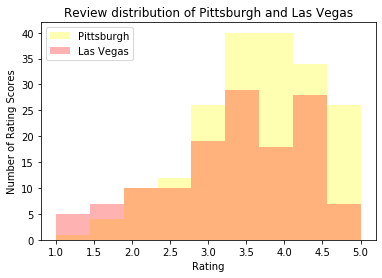

In [34]:
plt.hist(
    pitt_stars,
    alpha = 0.3,
    color = 'yellow',
    label = 'Pittsburgh',
    bins = 'auto'
)

plt.hist(
    vegas_stars,
    alpha = 0.3,
    color = 'red',
    label = 'Las Vegas',
    bins = 'auto'
)

plt.xlabel("Rating")
plt.ylabel("Number of Rating Scores")

plt.legend(loc = 'best')

plt.title("Review distribution of Pittsburgh and Las Vegas")

plt.show()

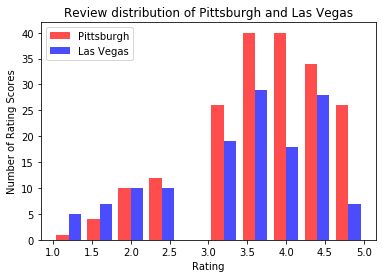

In [37]:
plt.hist(
    [pitt_stars, vegas_stars],
    alpha = 0.7,
    color = ['red', 'blue'],
    label = ['Pittsburgh', 'Las Vegas'],
    bins = 'auto'
)

plt.xlabel('Rating')
plt.ylabel('Number of Rating Scores')

plt.legend(loc = 'best')

plt.title('Review distribution of Pittsburgh and Las Vegas')

plt.show()

## Scatterplots

In [38]:
df_health = df[df["category_0"] == "Health & Medical"]
df_fast = df[df["category_0"] == "Fast Food"]
df_break = df[df["category_0"] == "Breakfast & Brunch"]
df_break.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state,rating
24,Gab & Eat,Breakfast & Brunch,Sandwiches,True,69,4.5,3,1,Carnegie,PA,9.0 out of 10
131,Crepes Parisiennes,Breakfast & Brunch,Creperies,True,73,4.0,8,1,Pittsburgh,PA,8.0 out of 10
240,Ritters Diner,Breakfast & Brunch,American (Traditional),True,146,3.5,8,1,Pittsburgh,PA,7.0 out of 10
266,The Bloomfield Sandwich Shop,Breakfast & Brunch,Sandwiches,True,41,4.0,8,1,Pittsburgh,PA,8.0 out of 10
268,The Dor-Stop Restaurant,Breakfast & Brunch,Diners,True,275,4.5,8,1,Pittsburgh,PA,9.0 out of 10


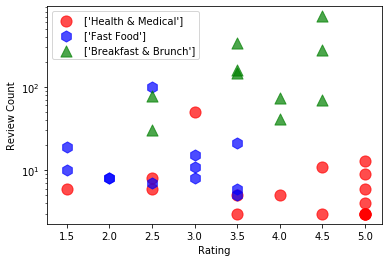

In [42]:
plt.scatter(
    df_health["stars"], df_health["review_count"],
    marker = "o",
    color = 'r',
    alpha = 0.7,
    s = 124,
    label = ['Health & Medical']
)

plt.scatter(
    df_fast["stars"], df_fast["review_count"],
    marker = "h",
    color = 'b',
    alpha = 0.7,
    s = 124,
    label = ['Fast Food']
)

plt.scatter(
    df_break["stars"], df_break["review_count"],
    marker = "^",
    color = 'g',
    alpha = 0.7,
    s = 124,
    label = ['Breakfast & Brunch']
)

plt.xlabel('Rating')
plt.ylabel('Review Count')

plt.legend(loc = 'upper left')

axes = plt.gca()
axes.set_yscale('log')

plt.show()


